In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
from pandas_profiling import ProfileReport as pr
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [99]:
df = pd.read_excel("Train.xlsx")
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [101]:
round(df.isna().sum() * 100 / len(df) , 2).sort_values(ascending = False)

Rating                55.39
Miscellaneous_Info    43.95
Place                  0.42
Qualification          0.00
Experience             0.00
Profile                0.00
Fees                   0.00
dtype: float64

In [102]:
df.isna().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [103]:
tt = pd.read_excel("Test.xlsx")
tt

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [104]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [105]:
round(tt.isna().sum() * 100 / len(tt) , 2).sort_values(ascending = False)

Rating                54.86
Miscellaneous_Info    41.97
Place                  0.30
Qualification          0.00
Experience             0.00
Profile                0.00
dtype: float64

In [6]:
pr(df)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [106]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [107]:
df = df.append(tt , ignore_index = True , sort = False)

In [108]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0
...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN
7946,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN


In [109]:
df["Experience"] = df["Experience"].str.split().str[0].astype(int)

In [110]:
df["Experience"].isna().sum()

0

In [111]:
df["Rating"] = df["Rating"].str.split("%").str[0]

In [112]:
df["Rating"].isna().sum()

4392

The number of unique values in Qualification column is/are : 1801


The unique values in Qualification column is/are : ['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Medicine, Post Graduate Diploma in Diabetology (PGDD), MBBS, FRCP - Internal Medicine'
 'MBBS, MS - General Surgery, FAIS, FIAGES'
 'MBBS, MD / MS - Obstetrics & Gynaecology']


The number of missing values are : 0 and the percentage of 0.0 %


The value counts for each value in Qualification column is/are :  
BDS                                                                                                                            632
BHMS                                                                                                                           627
BAMS                                                                                                                           624
MBBS                                                                       

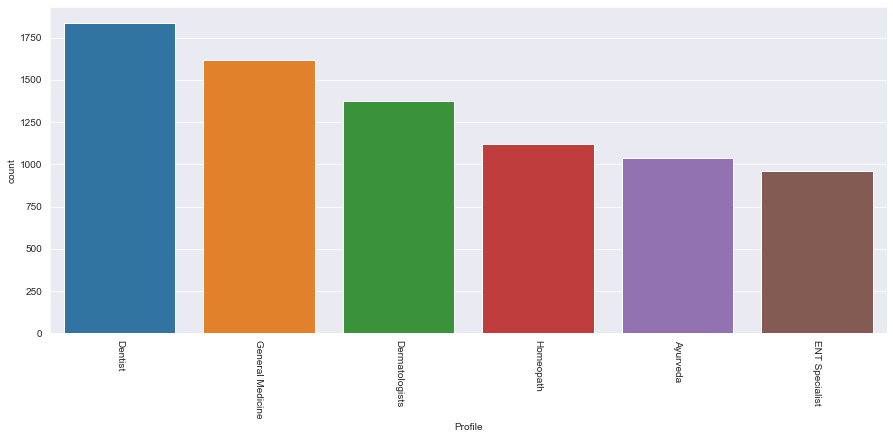

****************************************************************************************************



The number of unique values in Miscellaneous_Info column is/are : 3981


The unique values in Miscellaneous_Info column is/are : ['100% 16 Feedback Kakkanad, Ernakulam'
 '98% 76 Feedback Whitefield, Bangalore' nan ...
 'General Dentistry Dental Fillings RCT - Single Sitting'
 '98% 240 Feedback Velachery, Chennai'
 'RCT - Root Canal Treatment Root Canal Treatment - Rotary Pyorrhoea Treatment']


The number of missing values are : 3454 and the percentage of 43.45747357825868 %


The value counts for each value in Miscellaneous_Info column is/are :  
Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                   50
Skin Allergy Treatment Skin Allergies Dermabrasion                                   18
Tooth Extraction Dental Fillings Scaling / Polishing                                 16
Dental Fillings Zirconia Crowns Dental Implant Fixing                         

In [50]:
for i in df.columns:
    print(f"The number of unique values in {i} column is/are : {len(df[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are : {df[i].unique()}")
    print("\n")
    print(f"The number of missing values are : {df[i].isna().sum()} and the percentage of {df[i].isna().sum() * 100 / len(df)} %")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print("\n\n")
    if len(df[i].unique()) < 12 :
        plt.figure(figsize = (15 , 6))
        sns.countplot(data = df , x = i , order = df[i].value_counts().index)
        plt.xticks(rotation = -90)
        plt.show()
    print("*"*100)
    print("\n\n")

In [113]:
df.drop(["Rating" , "Miscellaneous_Info"] , axis = 1 , inplace = True)

In [114]:
df.head()

,Qualification,Experience,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,"Kakkanad, Ernakulam",Homeopath,100.0
1,"BAMS, MD - Ayurveda Medicine",12,"Whitefield, Bangalore",Ayurveda,350.0
2,"MBBS, MS - Otorhinolaryngology",9,"Mathikere - BEL, Bangalore",ENT Specialist,300.0
3,"BSc - Zoology, BAMS",12,"Bannerghatta Road, Bangalore",Ayurveda,250.0
4,BAMS,20,"Keelkattalai, Chennai",Ayurveda,250.0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  7948 non-null   object 
 1   Experience     7948 non-null   int32  
 2   Place          7917 non-null   object 
 3   Profile        7948 non-null   object 
 4   Fees           5961 non-null   float64
dtypes: float64(1), int32(1), object(3)
memory usage: 279.5+ KB


In [116]:
df["Place"].fillna("Unknown" , inplace = True)

In [117]:
df["Qualification"].loc[df["Qualification"] == "39 years experience"] = "MBBS"

In [118]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
qual = te.fit_transform(df["Qualification"].str.split(", ")).astype(int)

In [119]:
title

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [120]:
te.columns_

['ACDMC',
 'ACLS',
 'AFIH',
 'AMI Essentials- Applied Workshop for Aesthetic Procedures',
 'AOC in Aesthetic Dentistry',
 'Advance Course In Osteoporosis',
 'Advance Course on Diagnosis of Allergy and Immunotherapy',
 'Advance Diploma in Nutrition and Dietetics',
 'Advance Fellowship in Laser & Dermatosurgery',
 'Advanced Certificate Course In Diabetes',
 'Advanced Certificate Course in Aesthetic Dentistry',
 'Advanced Certificate Course in Dental Implants',
 'Advanced Certificate in Endodontics and Esthetics',
 'Advanced Certification in Clinical Diabetology',
 'Advanced Course in Cosmetology and Aesthetic Medicine',
 'Advanced Endoscopy Training',
 'Advanced Endotontic Course On Root Canal',
 'Advanced Retreatment Course in RCT',
 'Advanced Surgical Training In Implants',
 'Advanced Training Program in Diabetes Care',
 'Advanced Trauma Life Support (ATLS)',
 'Ayurvedic panchkarma',
 'B.Ac',
 'B.Sc',
 'B.Sc - Zoology (Hons.)',
 'BA',
 'BAMS',
 'BDS',
 'BEMS',
 'BHMS',
 'BIMS',
 'BNYS'

In [121]:
qual = pd.DataFrame(qual , columns = te.columns_)
qual

,ACDMC,ACLS,AFIH,AMI Essentials- Applied Workshop for Aesthetic Procedures,AOC in Aesthetic Dentistry,Advance Course In Osteoporosis,Advance Course on Diagnosis of Allergy and Immunotherapy,Advance Diploma in Nutrition and Dietetics,Advance Fellowship in Laser & Dermatosurgery,Advanced Certificate Course In Diabetes,...,UK),USA),Venereology & Leprosy,WHO/IDF/EASD Cambridge Diabetes Training,Weight Management Consultant Certificate,Yoga Instructor's Course,Yoga Teachers Training Course,certification in smile designing,"fellowship in medical cosmetology,germany",post graduate diploma in health Sciences in diabetology
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7944,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
df.isna().sum()

Qualification       0
Experience          0
Place               0
Profile             0
Fees             1987
dtype: int64

In [123]:
df_1 = df.copy()

In [124]:
df.head()

,Qualification,Experience,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,"Kakkanad, Ernakulam",Homeopath,100.0
1,"BAMS, MD - Ayurveda Medicine",12,"Whitefield, Bangalore",Ayurveda,350.0
2,"MBBS, MS - Otorhinolaryngology",9,"Mathikere - BEL, Bangalore",ENT Specialist,300.0
3,"BSc - Zoology, BAMS",12,"Bannerghatta Road, Bangalore",Ayurveda,250.0
4,BAMS,20,"Keelkattalai, Chennai",Ayurveda,250.0


In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf1 = TfidfVectorizer(ngram_range = (1, 1) , lowercase = True)
df_place = tf1.fit_transform(df['Place'])
df_place = pd.DataFrame(data = df_place.toarray() , columns = tf1.get_feature_names())

In [126]:
df_place

,10,11,12,13,15,1st,20,22,23,24,...,whitefield,wilson,worli,yakutpura,yamuna,yelahanka,yellareddyguda,yemalur,yeshwanthpur,yousufguda
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.913012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
df["Location"] = df["Place"].str.split(",").str[0]
df["City"] = df["Place"].str.split(",").str[1]

In [130]:
df_2 = df.copy()

In [129]:
df = pd.concat([df , df_place , qual] , axis = 1)

In [131]:
df

,Qualification,Experience,Place,Profile,Fees,Location,City,10,11,12,...,UK),USA),Venereology & Leprosy,WHO/IDF/EASD Cambridge Diabetes Training,Weight Management Consultant Certificate,Yoga Instructor's Course,Yoga Teachers Training Course,certification in smile designing,"fellowship in medical cosmetology,germany",post graduate diploma in health Sciences in diabetology
0,"BHMS, MD - Homeopathy",24,"Kakkanad, Ernakulam",Homeopath,100.0,Kakkanad,Ernakulam,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,"Whitefield, Bangalore",Ayurveda,350.0,Whitefield,Bangalore,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,"Mathikere - BEL, Bangalore",ENT Specialist,300.0,Mathikere - BEL,Bangalore,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,"Bannerghatta Road, Bangalore",Ayurveda,250.0,Bannerghatta Road,Bangalore,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,BAMS,20,"Keelkattalai, Chennai",Ayurveda,250.0,Keelkattalai,Chennai,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10,"Basavanagudi, Bangalore",Ayurveda,NaN,Basavanagudi,Bangalore,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4,"Choolai, Chennai",Dermatologists,NaN,Choolai,Chennai,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9,"Porur, Chennai",General Medicine,NaN,Porur,Chennai,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7946,BDS,12,"Arekere, Bangalore",Dentist,NaN,Arekere,Bangalore,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
# agg_func = {
#     'VOTES': ['mean','median'],
#     'RATING': ['mean','median']
    
# }
# agg_city = df.groupby('CITY').agg(agg_func)
# agg_city.columns = [ 'CITY_' + ('_'.join(col).strip()) for col in agg_city.columns.values]
# agg_city.reset_index(inplace=True)

In [133]:
df.drop(["Place"] , axis = 1 , inplace = True)

In [134]:
df.head()

,Qualification,Experience,Profile,Fees,Location,City,10,11,12,13,...,UK),USA),Venereology & Leprosy,WHO/IDF/EASD Cambridge Diabetes Training,Weight Management Consultant Certificate,Yoga Instructor's Course,Yoga Teachers Training Course,certification in smile designing,"fellowship in medical cosmetology,germany",post graduate diploma in health Sciences in diabetology
0,"BHMS, MD - Homeopathy",24,Homeopath,100.0,Kakkanad,Ernakulam,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,Ayurveda,350.0,Whitefield,Bangalore,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,ENT Specialist,300.0,Mathikere - BEL,Bangalore,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,Ayurveda,250.0,Bannerghatta Road,Bangalore,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,BAMS,20,Ayurveda,250.0,Keelkattalai,Chennai,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
df.isna().sum()

Qualification                                                 0
Experience                                                    0
Profile                                                       0
Fees                                                       1987
Location                                                      0
                                                           ... 
Yoga Instructor's Course                                      0
Yoga Teachers Training Course                                 0
certification in smile designing                              0
fellowship in medical cosmetology,germany                     0
post graduate diploma in health Sciences in diabetology       0
Length: 1796, dtype: int64

In [136]:
df.drop(["Qualification"] , axis = 1 , inplace = True)

In [137]:
df.head()

,Experience,Profile,Fees,Location,City,10,11,12,13,15,...,UK),USA),Venereology & Leprosy,WHO/IDF/EASD Cambridge Diabetes Training,Weight Management Consultant Certificate,Yoga Instructor's Course,Yoga Teachers Training Course,certification in smile designing,"fellowship in medical cosmetology,germany",post graduate diploma in health Sciences in diabetology
0,24,Homeopath,100.0,Kakkanad,Ernakulam,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,12,Ayurveda,350.0,Whitefield,Bangalore,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,9,ENT Specialist,300.0,Mathikere - BEL,Bangalore,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,12,Ayurveda,250.0,Bannerghatta Road,Bangalore,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,20,Ayurveda,250.0,Keelkattalai,Chennai,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
df.drop(["Location" , "City"] , axis = 1 , inplace = True)

In [139]:
df = pd.get_dummies(df , columns = ["Profile"])

In [149]:
tt = df[df["Fees"].isnull() == True]
df = df[df["Fees"].isnull() != True]
tt.drop("Fees", axis = 1 , inplace = True)

In [150]:
X = df.drop(["Fees"] , axis = 1)
y = df["Fees"]

In [156]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(4768, 1193, 4768, 1193)

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

ints = ["Experience"]
X_train[ints] = scaler.fit_transform(X_train[ints])
X_test[ints] = scaler.transform(X_test[ints])
tt[ints] = scaler.transform(tt[ints])

In [158]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_log_error , mean_squared_error , mean_absolute_error
from sklearn.model_selection import cross_val_score

In [163]:
models = []
models.append(('XGBRegressor', XGBRegressor(random_state = 42 , objective ='reg:squarederror')))
models.append(("CatBoost Regressor" , CatBoostRegressor(random_state = 42 , verbose = 0 , eval_metric = "RMSE" , allow_writing_files = False)))
models.append(("Gradient Boosting" , GradientBoostingRegressor(n_estimators = 200 , random_state = 42)))
models.append(("ExtraTrees Regressor" , ExtraTreesRegressor(n_estimators = 200 , random_state = 42)))
models.append(("Bagging Regressor" , BaggingRegressor(n_estimators = 200 , random_state = 42)))
models.append(('RandomForest Regressor', RandomForestRegressor(n_estimators = 200 , random_state = 42)))

In [164]:
def metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    
    if not params:
        accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 5)
        
    rmse = mean_squared_error(y_test , preds , squared = False)
    log_error = mean_squared_log_error(y_test , preds)
    score = 1 - np.sqrt(np.square(np.log10(preds +1) - np.log10(y_test +1)).mean())
    
    print("\n")            
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    if not params : 
        print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
        print("\n")
    
        print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
        print("\n")
    
    print(f"RMSE : {rmse:.4f}")
    print("\n")
    
    print(f"Log Error : {log_error:.4f}")
    print("\n")    
    
    print(f"Score : {score:.4f}")
    print("\n")            
    
    plt.figure(figsize = (10 , 6))
    plt.scatter(y_test , preds)
    x = np.linspace(min(y_test) , max(y_test) , 100)
    y = x
    plt.plot(x, y , "-r")
    plt.show()
    
    print("\n")

    print("*"*100)
    
    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    if not params:
        sam.append(np.mean(accuracies))
        sam.append(np.std(accuracies))
    sam.append(rmse)
    sam.append(log_error)
    sam.append(score)
    
    return sam , mod



XGBRegressor


Training score : 0.5480


Test Score : 0.2806


K-fold accuracy : 0.2229


Standard Deviation of Accuracies in k-fold : 0.0187


RMSE : 157.4232


Log Error : 0.3430


Score : 0.7456




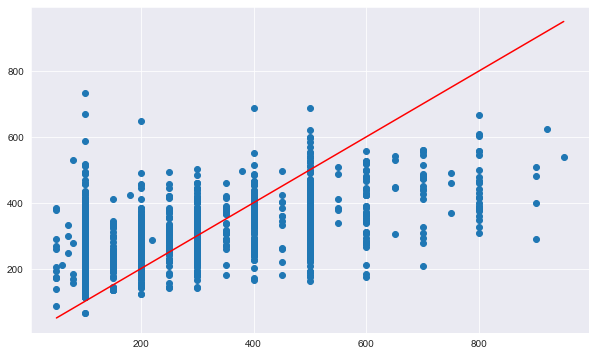



****************************************************************************************************





CatBoost Regressor


Training score : 0.4724


Test Score : 0.2916


K-fold accuracy : 0.2395


Standard Deviation of Accuracies in k-fold : 0.0135


RMSE : 156.2142


Log Error : 0.3436


Score : 0.7454




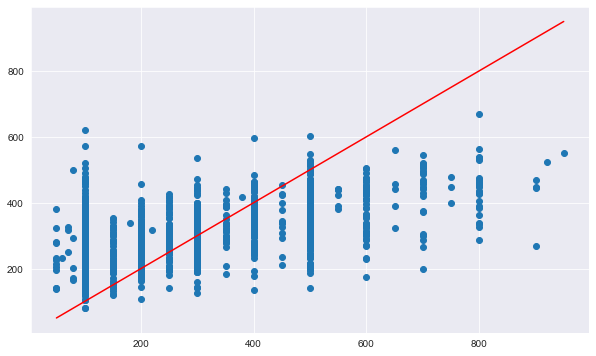



****************************************************************************************************





Gradient Boosting


Training score : 0.3502


Test Score : 0.2385


K-fold accuracy : 0.2185


Standard Deviation of Accuracies in k-fold : 0.0200


RMSE : 161.9633


Log Error : 0.3676


Score : 0.7367




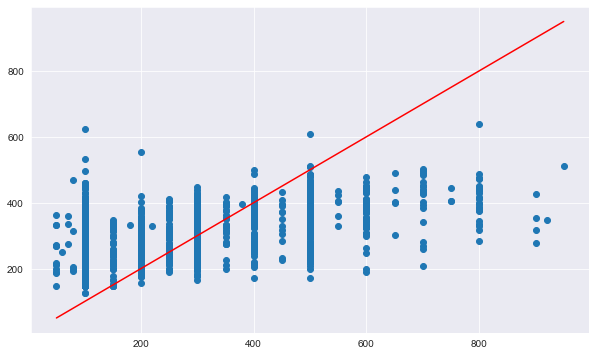



****************************************************************************************************





ExtraTrees Regressor


Training score : 0.9957


Test Score : 0.1077


K-fold accuracy : 0.0333


Standard Deviation of Accuracies in k-fold : 0.0604


RMSE : 175.3184


Log Error : 0.3902


Score : 0.7287




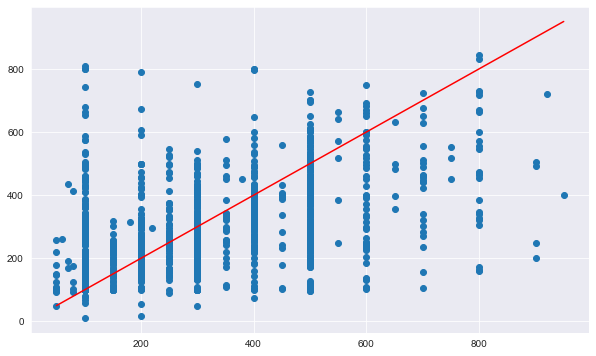



****************************************************************************************************





Bagging Regressor


Training score : 0.8881


Test Score : 0.2543


K-fold accuracy : 0.2003


Standard Deviation of Accuracies in k-fold : 0.0148


RMSE : 160.2699


Log Error : 0.3305


Score : 0.7503




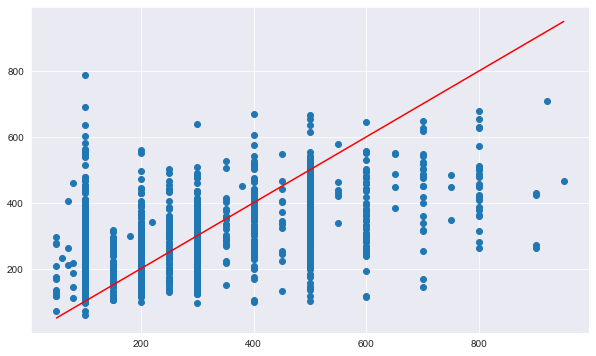



****************************************************************************************************





RandomForest Regressor


Training score : 0.8878


Test Score : 0.2504


K-fold accuracy : 0.1999


Standard Deviation of Accuracies in k-fold : 0.0156


RMSE : 160.6928


Log Error : 0.3317


Score : 0.7499




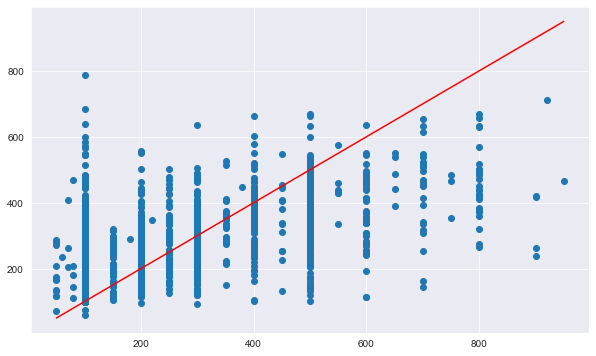



****************************************************************************************************



Wall time: 32min 38s


In [165]:
%%time

pre_final = []
for i in models:
    sam = metrics(i , X_train , y_train , X_test , y_test)
    pre_final.append(sam)

In [166]:
data_pre_final = [x[0] for x in pre_final]

In [168]:
me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "RMSE" , "Log Error" , "Evaluation_Score"])

me.sort_values(by = ["Evaluation_Score" , "RMSE" , "Log Error" , "K-fold Accuracy" ,  "Train Score" , "Test Score"] , inplace = True , ascending = (False , True , True , False , False , False))
me = me.reset_index(drop = True)

me

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,RMSE,Log Error,Evaluation_Score
0,Bagging Regressor,0.888080,0.254311,0.200280,0.014761,160.269876,0.330510,0.750324
1,RandomForest Regressor,0.887825,0.250370,0.199891,0.015595,160.692799,0.331672,0.749885
2,XGBRegressor,0.548003,0.280566,0.222933,0.018662,157.423154,0.343043,0.745634
3,CatBoost Regressor,0.472358,0.291573,0.239464,0.013477,156.214182,0.343550,0.745446
4,Gradient Boosting,0.350163,0.238469,0.218456,0.019984,161.963344,0.367550,0.736705
5,ExtraTrees Regressor,0.995722,0.107704,0.033340,0.060427,175.318371,0.390208,0.728711


In [169]:
bag = pre_final[4][1]
bag

BaggingRegressor(n_estimators=200, random_state=42)

In [170]:
preds = bag.predict(tt)
preds

array([255.75, 333.8 , 255.5 , ..., 273.75, 219.5 , 426.  ])

In [176]:
preds = preds.round(0).astype(int)

In [177]:
final = pd.DataFrame({"Fees" : preds})
final

,Fees
0,256
1,334
2,256
3,247
4,282
...,...
1982,206
1983,316
1984,274
1985,220


In [178]:
final.to_csv("Bagging_1.csv" , index = False)